In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Metoda Bisekcji
Przykładowa funkcja

In [80]:
def fun(x):
    return x**8 - 36*x**7 + 546*x**6 - 4536*x**5 + 22449*x**4 - 67284*x**3 + 118124*x**2 - 109584*x + 40320

In [114]:
def bisec(a,b, fun, eps, x_zero):
    an = a
    bn = b
    X = []
    Y = []
    cn = (an+bn)/2
    cn_list = [cn]
    i = 0
    
    while np.abs(bn-an) > eps:
            
        if i > 100:
            print('Przekroczono ilość iteracji')
            return False

        if fun(an)*fun(bn)>0:
            an = cn
            bn = bn
        elif fun(an)*fun(bn)<0:
            an = an
            bn = cn
        else:
            
            return cn, X, Y

        cn = (an+bn)/2
        cn_list.append(cn)
        i += 0
    
    for j in range(len(cn_list)-1):   
        X.append(np.log(np.abs(cn_list[j]-x_zero)))
        Y.append(np.log(np.abs(cn_list[j+1]-x_zero)))
        
    return cn, X, Y

In [115]:
def draw_bisec(x2, X, Y, title=''):

    pfit = np.polyfit(X, Y, 1)
    print('Wyliczone miejsce zerowe: ', x2)

    print('Numeryczna wartość alfa: ', pfit[0])


    plt.scatter(X, Y, label = f'alfa = {pfit[0]}')
    plt.plot(X, np.polyval(pfit, X))
    plt.legend()
    plt.title(f'{title}')
    plt.show()

Wyliczone miejsce zerowe:  5.9499664306640625
Numeryczna wartość alfa:  0.5281147611621271


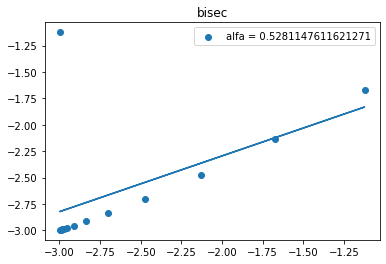

In [116]:
result = bisec(5.4,6.5,fun,0.0001, 6)
draw_bisec(result[0], result[1], result [2], 'bisec')

### Przykładowe funkcje oraz ich pochodne

In [70]:
def a(x):
    return np.sin(x/2)-1

def a_prim(x):
    return 0.5*np.cos(x/2)

def b(x):
    return np.e**x-np.tan(x)

def b_prim(x):
    return np.e**x-1/((np.cos(x))**2)

def c(x):
    return x**3-12*x**2+3*x+1

def c_prim(x):
    return (x**2-8*x+1)*3

### Metoda Newtona

In [117]:
def Newton(x, f, f_prim, epsilon, x_zero):

    x1 = x
    x2 = x1 - f(x1)/f_prim(x1)
    i = 0

    X = []
    Y = []

    while np.abs(x1-x2) > epsilon:
        X.append(np.log(np.abs(x1 - x_zero)))
        Y.append(np.log(np.abs(x2 - x_zero)))
        x1, x2 = x2, x2 - f(x2)/f_prim(x2)

        i += 1
        if i > 100:
            print('Przekroczono ilość iteracji')
            return False
    return x2, X, Y

def draw(x2, X, Y,theo_alfa, title=''):

    pfit = np.polyfit(X, Y, 1)
    print('Wyliczone miejsce zerowe: ', x2)

    print('Numeryczna wartość alfa: ', pfit[0])

    print('Teoretyczna wartość alfa: ', theo_alfa)

    plt.scatter(X, Y, label = f'alfa = {pfit[0]}')
    plt.plot(X, np.polyval(pfit, X))
    plt.legend()
    plt.title(f'{title}')
    plt.show()
    

### Metoda Newtona dla $f(x) = \sin{\frac{x}{2}}-1, x_0 = 0.4\pi$

Wyliczone miejsce zerowe:  3.141591845085682
Numeryczna wartość alfa:  0.9978642972013485
Teoretyczna wartość alfa:  2


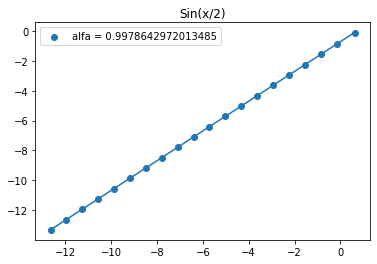

In [118]:
result = Newton(0.4*np.pi, a, a_prim, 0.000001, np.pi)
draw(result[0], result[1], result[2], 2, 'Sin(x/2)')


### Metoda Newtona dla $f(x) = e^x-\tan{x}, x_0 = 1.4$

Wyliczone miejsce zerowe:  1.3063269404230793
Numeryczna wartość alfa:  1.9482163333706275
Teoretyczna wartość alfa:  2


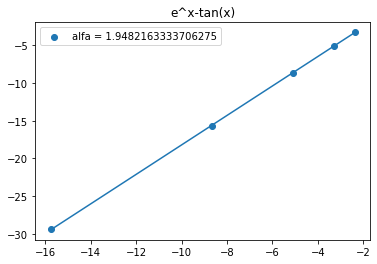

In [120]:
x_aprox = 1.306326940423
result = Newton(1.4, b, b_prim, 0.0000001, x_aprox)
draw(result[0], result[1], result[2], 2, 'e^x-tan(x)')

### Metoda Newtona dla $f(x) = x^3 - 12x^2 + 3x + 1, x_0 = 1$

Wyliczone miejsce zerowe:  0.45154322422848736
Numeryczna wartość alfa:  0.3591160364504663
Teoretyczna wartość alfa:  2


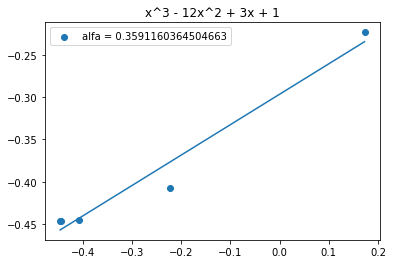

In [121]:
x_aprox = -0.188685403446543
result = Newton(1, c, c_prim, 0.0000001, x_aprox)
draw(result[0], result[1], result[2], 2, 'x^3 - 12x^2 + 3x + 1')

### zad 8 Metoda siecznych
Przypomnienie funkcji

In [4]:

def a(x):
    return np.sin(x/2)-1

def a_prim(x):
    return 0.5*np.cos(x/2)

def b(x):
    return np.e**x-np.tan(x)

def b_prim(x):
    return np.e**x-1/((np.cos(x))**2)

def c(x):
    return x**3-12*x**2+3*x+1

def c_prim(x):
    return (x**2-8*x+1)*3

In [8]:
def met_siecz2(x0, x1, fun, epsilon):

    x_list = [x0, x1]
    
    i = 0
    while np.abs(x_list[-2]-x_list[-1]) > epsilon:

        f_n = fun(x_list[i])
        f_n1 = fun(x_list[i+1])
        print(f_n)
        print(f_n1)
        result = x_list[i+1] - f_n1*(x_list[i+1]-x_list[i])/(f_n1-f_n)
        x_list.append(result)
        i += 1
    return x_list



In [9]:
def met_siecz(x0, x1, fun, epsilon):

    xn_1 = x0 #xn-1
    xn = x1 #xn
    
    i = 0
    while np.abs(xn_1 - xn) > epsilon:

        f_n1 = fun(xn_1) #f(xn-1)
        f_n = fun(xn)  #f(xn)
        
        result = xn - f_n*(xn - xn_1)/(f_n - f_n1)
        
        xn_1 = xn
        xn = result
        i += 1

        if i > 100:
            print('Przekroczono ilość iteracji')
            return False

    return xn


In [13]:
def met_siecz_alfa(x0, x1, fun, epsilon, x_zero):

    xn_1 = x0 #xn-1
    xn = x1 #xn
    X = []
    Y = []
    i = 0
    while np.abs(xn_1 - xn) > epsilon:

        f_n1 = fun(xn_1) #f(xn-1)
        f_n = fun(xn)  #f(xn)
        
        result = xn - f_n*(xn - xn_1)/(f_n - f_n1)
        
        X.append(np.log(np.abs(xn_1 - x_zero)))
        Y.append(np.log(np.abs(xn - x_zero)))

        xn_1 = xn
        xn = result
        i += 1

        if i > 100:
            print('Przekroczono ilość iteracji')
            return False

    return X, Y

### a) $f(x) = \sin{\frac{x}{2}}-1$
$ x_0 = 0.4\pi, x_1 = 0.2\pi$

In [10]:
# a) f(x) = sin(x/2)
print(met_siecz(0.4*np.pi, 0.2*np.pi, a, 0.0001))

3.1414843968277095


numeryczna wartość alfa [ 1.00316329 -0.44908047]
teoretyczna wartość alfa 1.618033988749895


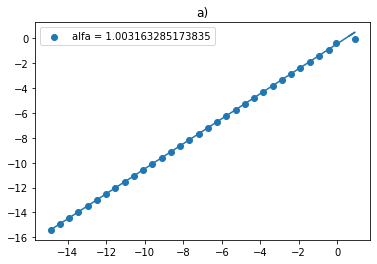

In [63]:
X_Y = met_siecz_alfa(0.4*np.pi, 0.2*np.pi, a, 0.0000001, np.pi)
X = X_Y[0]
Y = X_Y[1]

print("numeryczna wartość alfa", np.polyfit(X,Y, 1))

print("teoretyczna wartość alfa", (1 + np.sqrt(5))/2)

plt.scatter(X[1:], Y[1:], label = f'alfa = {np.polyfit(X,Y, 1)[0]}')
plt.plot(X, np.polyval(np.polyfit(X,Y,1), X))
plt.legend()
plt.title('a)')
plt.show()

### b) $f(x) = e^x - \tan{x}$
$ x_0 = 1.4, x_1 = 1.2$

In [11]:
# b) f(x) = e^x - tan(x)
print(met_siecz(1.4, 1.2, b, 0.0001))

1.306326856183283


Numeryczna wartość alfa  1.6282860257219312
Teoretyczna wartość alfa  1.618033988749895


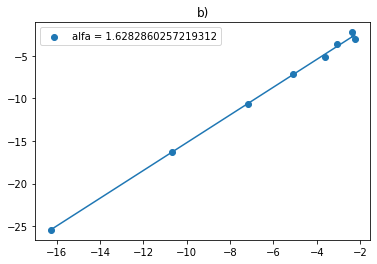

In [64]:
x = 1.30632694042307923617  #aprox x*
X_Y = met_siecz_alfa(1.4, 1.2, b, 0.00000000001, x)
X = X_Y[0]
Y = X_Y[1]

print('Numeryczna wartość alfa ', np.polyfit(X,Y, 1)[0])

print('Teoretyczna wartość alfa ', (1 + np.sqrt(5))/2)

plt.scatter(X, Y, label = f'alfa = {np.polyfit(X,Y, 1)[0]}')
plt.plot(X, np.polyval(np.polyfit(X,Y,1), X))
plt.legend()
plt.title('b)')
plt.show()

### c) $f(x) = x^3 - 12x^2 + 3x + 1$
$ x_0 = 1, x_1 = 0$

In [54]:
# c) f(x) = x^3 - 12x^2 + 3x + 1
print('Aproksymowane miejsce zerowe ',met_siecz(1, 0, c, 0.0001))

Aproksymowane miejsce zerowe  -0.18868537205325234


Numeryczna wartość alfa  1.5968851782799833
Teoretyczna wartość alfa  1.618033988749895


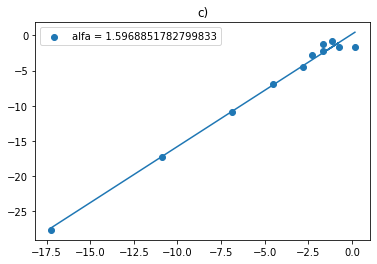

In [65]:
x = -0.188685403446543 #aprox x*
X_Y = met_siecz_alfa(1, 0, c, 0.000000001, x)
X = X_Y[0]l
Y = X_Y[1]

print('Numeryczna wartość alfa ', np.polyfit(X,Y, 1)[0])

print('Teoretyczna wartość alfa ',(1 + np.sqrt(5))/2)

plt.scatter(X, Y, label = f'alfa = {np.polyfit(X,Y, 1)[0]}')
plt.plot(X, np.polyval(np.polyfit(X,Y,1), X))
plt.legend()
plt.title('c)')
plt.show()